<a href="https://colab.research.google.com/github/megantoops/demo/blob/main/ICP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

data = {
    'ID': np.arange(1, 1000001),
    'Value': np.random.rand(1000000),
    'Category': np.random.choice(['A', 'B', 'C', 'D'], size=1000000)
}

df = pd.DataFrame(data)
print(df.head(10))
print(df['Value'])

df.columns = ['ID number', 'Random value', 'Choice']
print(df.head(5))

student_data = pd.DataFrame({
    'school_code': ['s001', 's002', 's003', 's001', 's002', 's004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco', 'Gino Mcneill', 'Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_Of_Birth': ['15/05/2002', '17/05/2002', '16/02/1999', '25/09/1998', '11/05/2002', '15/09/1997'],
    'age': [12, 13, 12, 13, 14, 12],
    'height': [173, 192, 186, 167, 151, 159],
    'weight': [35, 32, 33, 30, 31, 32],
    'address': ['street1', 'street2', 'street3', 'street1', 'street2', 'street4']
}, index=['S1', 'S2', 'S3', 'S4', 'S5', 'S6'])

print("Original DataFrame:")
print(student_data)

print("\nSplit the said data on school_code, class:")
result = student_data.groupby(['school_code', 'class'])

for name, group in result:
    print("\nGroup:", name)
    print(group)

   ID     Value Category
0   1  0.747158        B
1   2  0.203139        D
2   3  0.258959        A
3   4  0.470907        B
4   5  0.390394        B
5   6  0.567477        D
6   7  0.529355        A
7   8  0.437712        A
8   9  0.736188        D
9  10  0.141446        B
0         0.747158
1         0.203139
2         0.258959
3         0.470907
4         0.390394
            ...   
999995    0.975565
999996    0.139672
999997    0.533082
999998    0.553979
999999    0.828346
Name: Value, Length: 1000000, dtype: float64
   ID number  Random value Choice
0          1      0.747158      B
1          2      0.203139      D
2          3      0.258959      A
3          4      0.470907      B
4          5      0.390394      B
Original DataFrame:
   school_code class            name date_Of_Birth  age  height  weight  \
S1        s001     V  Alberto Franco    15/05/2002   12     173      35   
S2        s002     V    Gino Mcneill    17/05/2002   13     192      32   
S3        s003    VI  

Saving data.csv to data.csv
Statistical Description:
          Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000

Null Values Before Filling:
 Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

Null Values After Filling:
 Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

Aggregated Data:
          Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244

Calories between 500 and 1000:
      Duration  Pulse  Maxpulse  Calories
51    

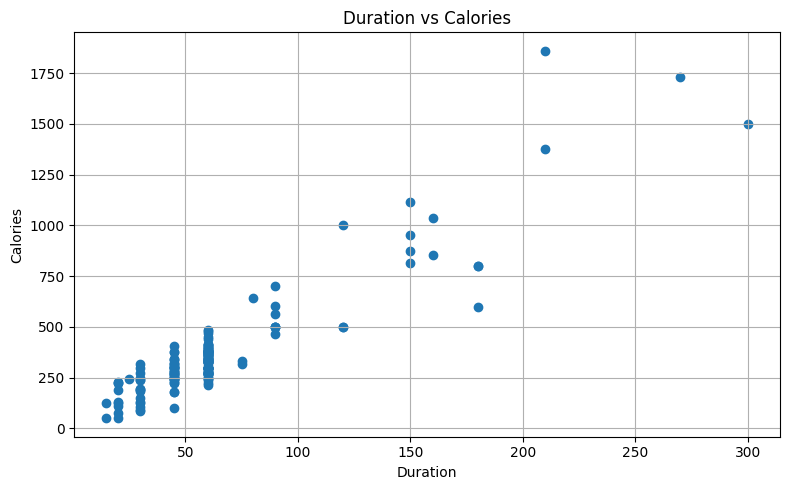

In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

print("Statistical Description:\n", df.describe())

print("\nNull Values Before Filling:\n", df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)
print("\nNull Values After Filling:\n", df.isnull().sum())

aggregated = df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])
print("\nAggregated Data:\n", aggregated)

df_filtered_500_1000 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print("\nCalories between 500 and 1000:\n", df_filtered_500_1000)

df_filtered = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print("\nCalories > 500 and Pulse < 100:\n", df_filtered)

df_modified = df.drop(columns=['Maxpulse'])

df['Calories'] = df['Calories'].astype(int)

plt.figure(figsize=(8, 5))
plt.scatter(df['Duration'], df['Calories'])
plt.title('Duration vs Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.grid(True)
plt.tight_layout()
plt.show()